In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data=pd.read_csv("../std_data.csv").drop(["id"],axis=1)

std = StandardScaler()

pca = PCA(n_components=5)
data_train = data.drop(["type"], axis=1)
color = data["type"]
data_train = std.fit_transform(data_train)
data_after_pca = pca.fit_transform(data_train)
print(pca.explained_variance_ratio_)
data_after_pca = pd.DataFrame(data_after_pca)
print(data_after_pca)


[0.2917337  0.16213824 0.11974728 0.0738582  0.07178066]
           0         1         2         3         4
0  -2.822949  0.783537  1.914950 -0.486855 -0.707237
1   0.130044  1.255846 -1.463708 -0.501260 -0.402941
2  -2.086479 -1.621001  0.344242 -0.053912 -1.134221
3  -2.837003  1.291020  2.303438 -0.375834 -0.177015
4  -3.411804  1.750495  1.310092 -0.315499 -0.210052
..       ...       ...       ...       ...       ...
64  3.289675  2.277595 -2.174808 -0.095563  0.145692
65  0.014963 -1.934747 -0.089297 -0.430331  0.234949
66  1.686975 -0.965536 -0.357128 -0.209274 -0.817710
67  1.729320 -1.158072 -0.164864 -0.188762 -0.570153
68  1.404507  1.322516 -0.258215 -0.506153 -0.620631

[69 rows x 5 columns]


/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning

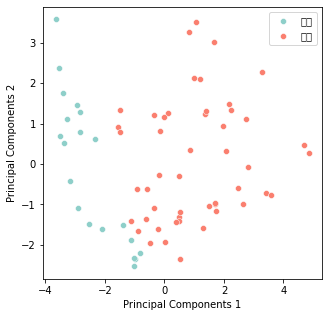

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
colors=[]
colors_=[]
mask=[]
mask_=[]
for i in range(len(color)):
    if color[i] == 1:
        # 高钾
        colors.append('#8ECFC9')
        mask.append(True)
        mask_.append(False)
    else:
        # 钡铅
        colors_.append('#FA7F6F')
        mask_.append(True)
        mask.append(False)
%matplotlib inline
plt.figure(figsize=[5, 5])
sns.scatterplot(x=(np.array(data_after_pca[0])[mask]),
                y=(np.array(data_after_pca[1])[mask]), color='#8ECFC9', label='高钾')
sns.scatterplot(x=(np.array(data_after_pca[0])[mask_]),
                y=(np.array(data_after_pca[1])[mask_]), color='#FA7F6F', label='钡铅')
plt.xlabel("Principal Components 1")
plt.ylabel("Principal Components 2")
plt.legend()
plt.savefig("pca_fig.png")


In [25]:
# 确定权重
# 求指标在不同主成分线性组合中的系数
k1_spss = pca.components_.T
weight = (np.dot(k1_spss, pca.explained_variance_ratio_)) / np.sum(pca.explained_variance_ratio_)
print('weight:',weight)
# 
weighted_weight = weight/np.sum(weight)
print('weighted_weight:', weighted_weight)

print(np.abs(weight).argsort())


weight: [ 0.06206394 -0.25067724 -0.02747307 -0.04177491  0.06738597  0.02405838
 -0.00556065 -0.01315776  0.14164303  0.1385396   0.22632719  0.15450903
  0.19862555  0.03330752  0.18472547]
weighted_weight: [ 0.06953616 -0.28085763 -0.0307807  -0.04680442  0.07549893  0.0269549
 -0.00623012 -0.0147419   0.1586962   0.15521913  0.25357594  0.1731112
  0.22253915  0.03731759  0.20696556]
[ 6  7  5  2 13  3  0  4  9  8 11 14 12 10  1]


In [5]:
# 因子分析代码
from factor_analyzer import factor_analyzer, Rotator
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import MinMaxScaler,StandardScaler
data = pd.read_csv("../std_data.csv").drop(["id"], axis=1)
data=data.drop(["type"],axis=1)
std = StandardScaler()
data_zs = std.fit_transform(data)
data_zs
kmo = calculate_kmo(data)  
# bartlett球形度检验p值要小于0.05
bartlett = calculate_bartlett_sphericity(data)  
print("\n因子分析适用性检验:")
print('kmo:{},bartlett:{}'.format(kmo[1], bartlett[1]))

# 皮尔森相关系数
data_corr=data.corr()
print("\n相关系数:\n",data_corr)
#获得协方差矩阵，cov是numpy库中计算协方差的函数，获得协方差矩阵9*9
#注：标准化后的矩阵的协方差矩阵 即为 原始数据的相关系数矩阵
data_zs_cov = np.cov(data_zs.T)
print("\n协方差矩阵：\n",data_zs_cov)



因子分析适用性检验:
kmo:0.3262397308293979,bartlett:nan

相关系数:
           degree       sio       nao        ko       cao       mgo       alo  \
degree  1.000000 -0.401950 -0.033360 -0.580315 -0.166618 -0.126884 -0.172302   
sio    -0.401950  1.000000  0.144986  0.361133 -0.173903  0.032410  0.187792   
nao    -0.033360  0.144986  1.000000  0.108935 -0.148994 -0.001710  0.077210   
ko     -0.580315  0.361133  0.108935  1.000000  0.535752  0.255827  0.320561   
cao    -0.166618 -0.173903 -0.148994  0.535752  1.000000  0.302628  0.342471   
mgo    -0.126884  0.032410 -0.001710  0.255827  0.302628  1.000000  0.492743   
alo    -0.172302  0.187792  0.077210  0.320561  0.342471  0.492743  1.000000   
feo    -0.376862  0.098078 -0.170847  0.366693  0.452435  0.418589  0.411218   
cuo    -0.006888 -0.235874 -0.065341  0.077436  0.087653 -0.208272 -0.162756   
pbo     0.503356 -0.853243 -0.168749 -0.568140 -0.055398 -0.098958 -0.352490   
bao     0.213215 -0.630362 -0.027009 -0.407529 -0.208497 -0.3641

/home/cqy/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/home/cqy/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
